In [1]:
## general imports
import json
import numpy as np
import sys

## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.cocoanalyze import COCOanalyze

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
## set paths
#dataDir  = '.'
#dataType = 'val2014'
#annType  = 'person_keypoints'
#teamName = 'fakekeypoints100'

#annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
#resFile  = '%s/detections/%s_%s_%s_results.json'%(dataDir, teamName, annType, dataType)
annFile  = '../../data/mscoco2017/annotations/person_keypoints_val2017.json'
resFile  = 'vis_val2017_300000/json_detection.json'
print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

with open(annFile) as f:
    gt_data = json.load(f)

imgs_info = {i['id']:{'id':i['id'] ,
                      'width':i['width'],
                      'height':i['height']}
                       for i in gt_data['images']}

annFile:  [../../data/mscoco2017/annotations/person_keypoints_val2017.json]
resFile:  [vis_val2017_300000/json_detection.json]


In [3]:
with open(resFile) as f:
    team_dts = json.load(f)

team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

team_img_ids = set([d['image_id'] for d in team_dts])
print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO( annFile )

## initialize COCO detections api
coco_dt   = coco_gt.loadRes( team_dts )

## initialize COCO eval api
cocoEval = COCOeval(coco_gt, coco_dt, 'keypoints')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
# if teamName == 'fakekeypoints100':
#     imgIds  = sorted(coco_gt.getImgIds())[0:100]
#     coco_analyze.cocoEval.params.imgIds = imgIds

Loaded [5124] instances in [5000] images.
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.08s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.278
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.526
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.319
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.550
 Average Recall     (AR) @[ IoU=0.75      | area=   a

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.19s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.07s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.526
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.484
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.437
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.381
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.327
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.251
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.180
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.119
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.058
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] =

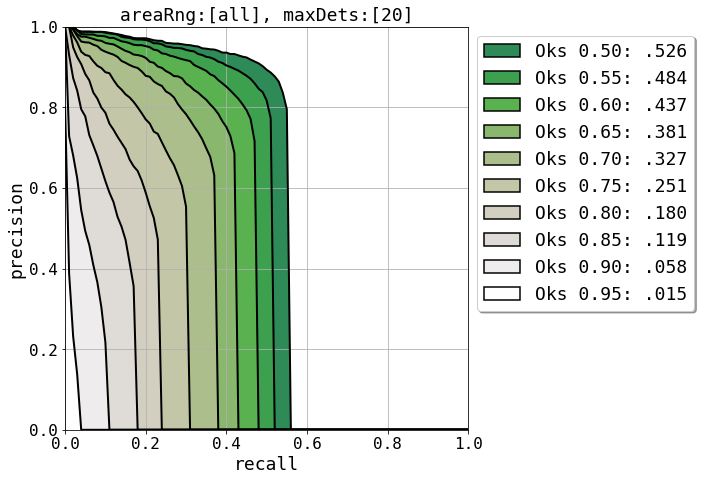

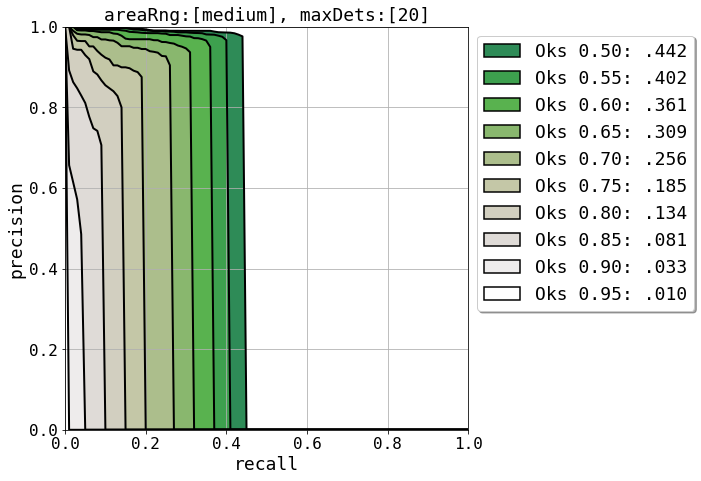

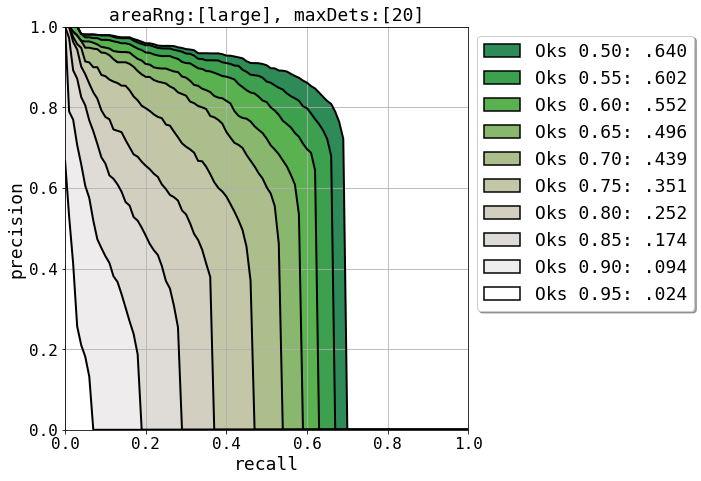

In [4]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
coco_analyze.evaluate(verbose=True, makeplots=True)

In [5]:
## NOTE: the values below are all default

# set OKS threshold of the extended error analysis
coco_analyze.params.oksThrs       = [.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]

# set OKS threshold required to match a detection to a ground truth
coco_analyze.params.oksLocThrs    = .1

# set KS threshold limits defining jitter errors
coco_analyze.params.jitterKsThrs = [.5,.85]

# set the localization errors to analyze and in what order
# note: different order will show different progressive improvement
# to study impact of single error type, study in isolation
coco_analyze.params.err_types = ['miss','swap','inversion','jitter']

# area ranges for evaluation
# 'all' range is union of medium and large
coco_analyze.params.areaRng       = [[32 ** 2, 1e5 ** 2]] #[96 ** 2, 1e5 ** 2],[32 ** 2, 96 ** 2]
coco_analyze.params.areaRngLbl    = ['all'] # 'large','medium' 

coco_analyze.params.maxDets = [20]

In [6]:
# use analyze() method for advanced error analysis 
# input arguments:
#  - check_kpts   : analyze keypoint localization errors for detections with a match (default: True)
#                 : default errors types are ['jitter','inversion','swap','miss']
#  - check_scores : analyze optimal score (maximizing oks over all matches) for every detection (default: True)
#  - check_bkgd   : analyze background false positives and false negatives (default: True)

coco_analyze.analyze(check_kpts=True, check_scores=True, check_bckgd=True)

Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=1.77s).
DONE (t=5.61s).
Analyzing detection scores...
<mrr:2.0>Running per image *optimal score* evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.08s).
DONE (t=2.76s).
Analyzing background false positives and false negatives...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.14s).
DONE (t=3.29s).


<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.26s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.03s).
Correcting area range [all]:
Correcting error type [miss]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.27s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.05s).
Correcting error type [swap]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.49s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.06s).
Correcting error type [inversion]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.40s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.05s).
Correcting error type [jitter]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.28s).
<mrr:2.0

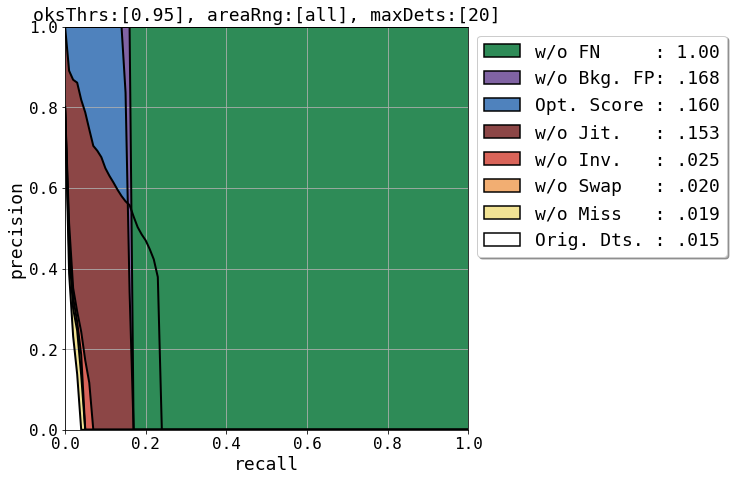

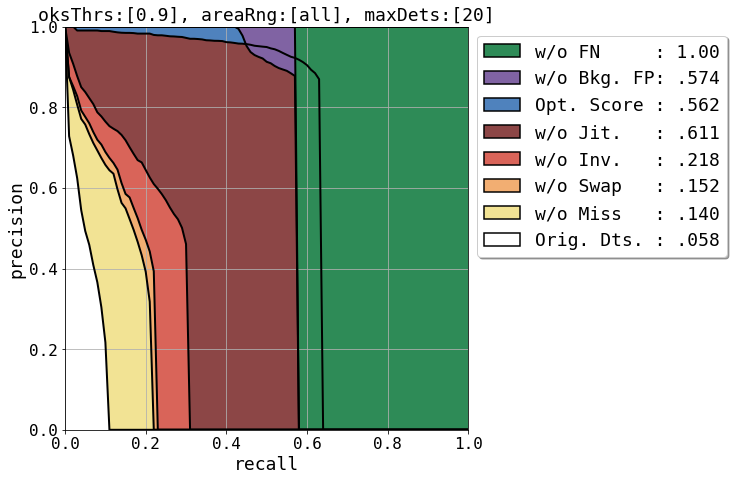

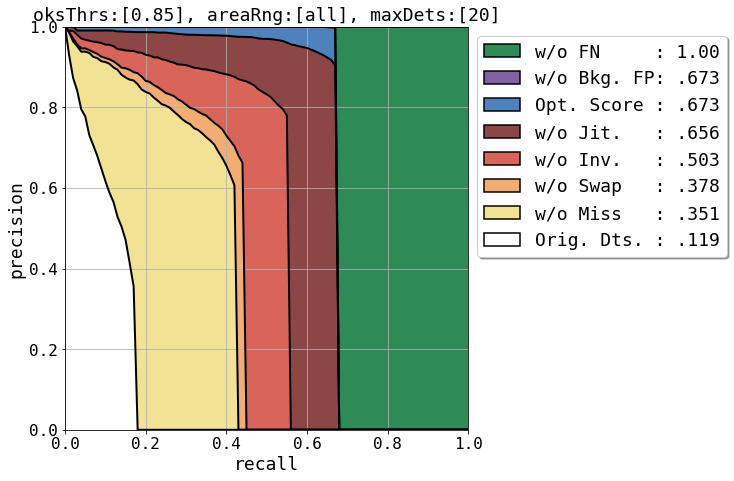

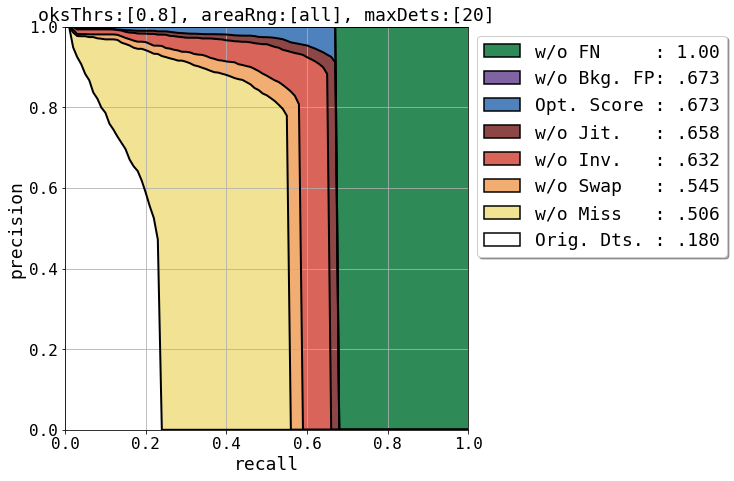

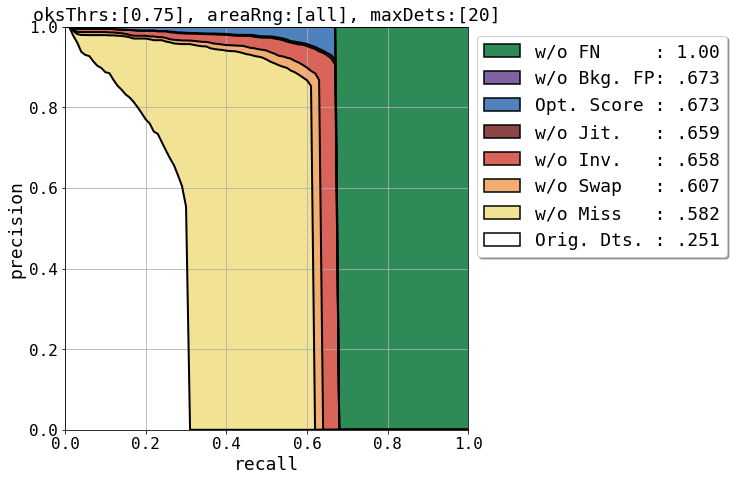

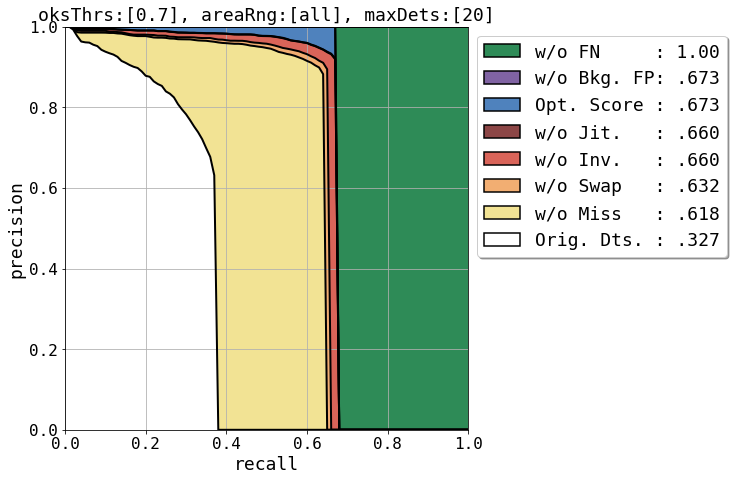

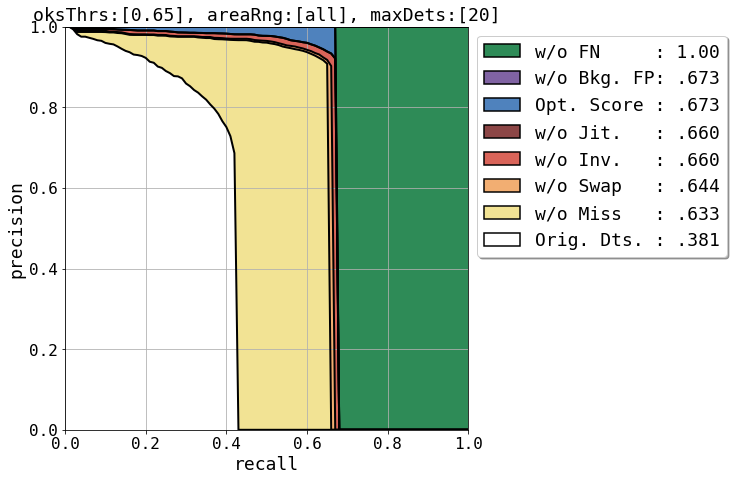

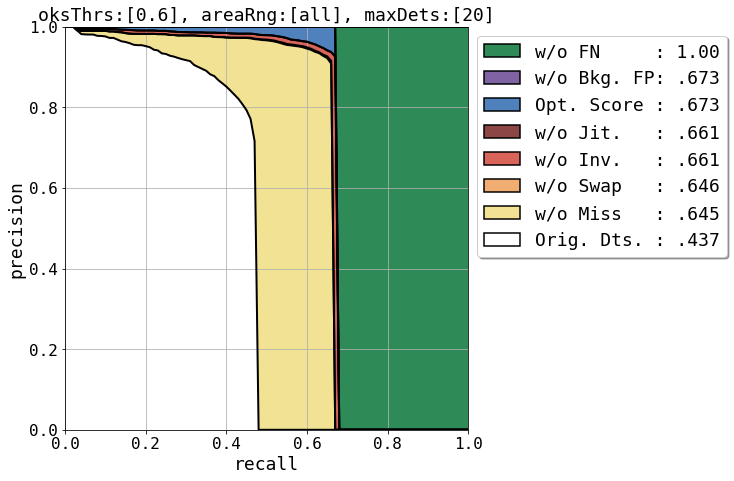

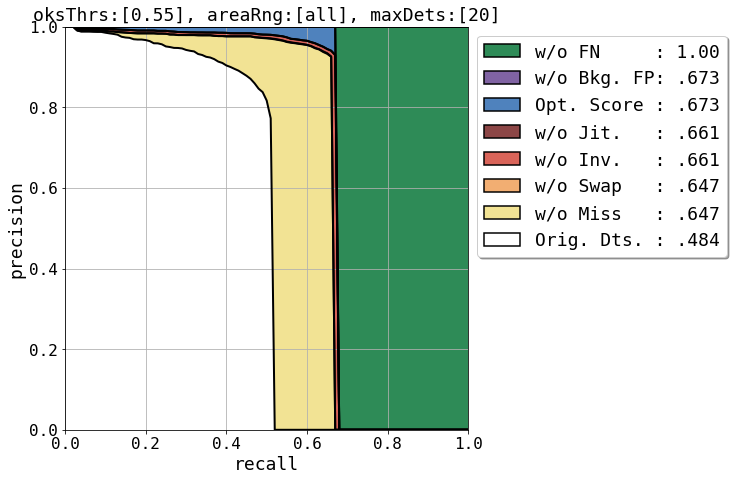

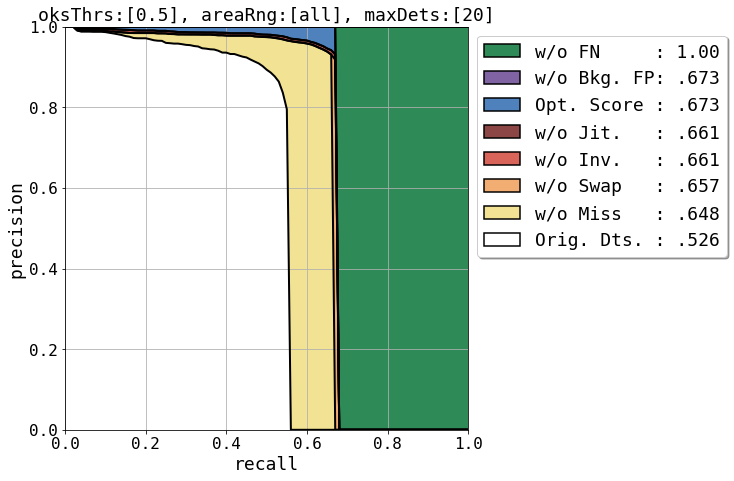

In [7]:
# use summarize() method to get the results after progressive correction of errors
# input arguments:
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.summarize(makeplots=True)

In [8]:
## print the performance summary 
for stat in coco_analyze.stats: print(stat)

{'auc': 0.01542148003620238, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.95, 'recall': 0.03447732997481108}
{'auc': 0.05766996980871428, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.9, 'recall': 0.10280226700251889}
{'auc': 0.11905211128376267, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.85, 'recall': 0.17506297229219145}
{'auc': 0.1795645559953195, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.8, 'recall': 0.2380352644836272}
{'auc': 0.251157469696903, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.75, 'recall': 0.30809193954659947}
{'auc': 0.3271539286906247, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.7, 'recall': 0.37405541561712846}
{'auc': 0.38145641723520846, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.65, 'recall': 0.4256926952141058}
{'auc': 0.43747484288820654, 'areaRngLbl': 'all', 'maxDets': 20, 'err': 'baseline', 'oks': 0.6, 'recall': 0.47213

In [9]:
## after analyze() has been called the following variables are available

# list of the corrected detections
corrected_dts = coco_analyze.corrected_dts['all']

i = 17
# info on keypoint detection localization error
print('good: %s'%corrected_dts[i]['good'])
print('miss: %s'%corrected_dts[i]['miss'])
print('swap: %s'%corrected_dts[i]['swap'])
print('inv.: %s'%corrected_dts[i]['inversion'])
print('jit.: %s\n'%corrected_dts[i]['jitter'])

# corrected keypoint locations
print('predicted keypoints:\n %s'%corrected_dts[i]['keypoints'])
print('corrected keypoints:\n %s\n'%corrected_dts[i]['opt_keypoints'])

# optimal detection score
print('original score: %s'%corrected_dts[i]['score'])
print('optimal score:  %s\n'%corrected_dts[i]['opt_score'])

good: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
miss: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
swap: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
inv.: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
jit.: [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

predicted keypoints:
 [473, 70, 2, 479, 67, 2, 468, 65, 2, 483, 65, 2, 461, 63, 2, 481, 83, 2, 452, 81, 2, 484, 108, 2, 447, 119, 2, 492, 121, 2, 479, 125, 2, 476, 138, 2, 456, 138, 2, 471, 186, 2, 456, 184, 2, 465, 232, 2, 455, 229, 2]
corrected keypoints:
 [473.0, 70, 2, 479.0, 67, 2, 468.0, 65, 2, 483.0, 65, 2, 461.0, 63, 2, 481.0, 83, 2, 452.0, 81, 2, 485.3823167757856, 115, 2, 443.3823167757856, 117, 2, 492.0, 121, 2, 479.0, 125, 2, 476.0, 138, 2, 456.0, 138, 2, 467.1622776601684, 192, 2, 474.65685424949237, 192, 2, 465.0, 232, 2, 455.0, 229, 2]

original score: 1.5547311305999756
optimal score:  0.9575807597901399



In [10]:
## after summarize() has been called the following variables are available

# list of the false positive detections and missed ground-truth annotations
false_pos_dts = coco_analyze.false_pos_dts
false_neg_gts = coco_analyze.false_neg_gts
for oks in coco_analyze.params.oksThrs:
    print("Oks:[%.2f] - Num.FP:[%d] - Num.FN:[%d]"%(oks,len(false_pos_dts['all',str(oks)]),len(false_neg_gts['all',str(oks)])))

Oks:[0.50] - Num.FP:[372] - Num.FN:[6428]
Oks:[0.55] - Num.FP:[380] - Num.FN:[6435]
Oks:[0.60] - Num.FP:[401] - Num.FN:[6449]
Oks:[0.65] - Num.FP:[424] - Num.FN:[6471]
Oks:[0.70] - Num.FP:[426] - Num.FN:[6471]
Oks:[0.75] - Num.FP:[447] - Num.FN:[6490]
Oks:[0.80] - Num.FP:[475] - Num.FN:[6516]
Oks:[0.85] - Num.FP:[529] - Num.FN:[6566]
Oks:[0.90] - Num.FP:[1062] - Num.FN:[7213]
Oks:[0.95] - Num.FP:[3331] - Num.FN:[9784]
